In [1]:
import pandas as pd
data = pd.read_csv("/content/Lung Cancer Dataset.csv")
data.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [2]:
data.columns

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

In [4]:
data['PULMONARY_DISEASE'].unique()

array(['NO', 'YES'], dtype=object)

In [5]:
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').apply(lambda x: x.str.strip())


In [7]:
# Inspect shape
print("Shape:", data.shape)
# Inspect datatypes
print("\nData types:\n", data.dtypes)

Shape: (5000, 18)

Data types:
 AGE                         int64
GENDER                      int64
SMOKING                     int64
FINGER_DISCOLORATION        int64
MENTAL_STRESS               int64
EXPOSURE_TO_POLLUTION       int64
LONG_TERM_ILLNESS           int64
ENERGY_LEVEL              float64
IMMUNE_WEAKNESS             int64
BREATHING_ISSUE             int64
ALCOHOL_CONSUMPTION         int64
THROAT_DISCOMFORT           int64
OXYGEN_SATURATION         float64
CHEST_TIGHTNESS             int64
FAMILY_HISTORY              int64
SMOKING_FAMILY_HISTORY      int64
STRESS_IMMUNE               int64
PULMONARY_DISEASE          object
dtype: object


In [8]:
# Check missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [9]:
from sklearn.impute import SimpleImputer

# Drop columns with >30% missing values
threshold = 0.3 * len(data)
data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() > threshold])

# Separate numeric and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Impute numeric with median, categorical with mode
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 1. Summary statistics
print(data.describe(include='all'))

                AGE       GENDER      SMOKING  FINGER_DISCOLORATION  \
count   5000.000000  5000.000000  5000.000000             5000.0000   
unique          NaN          NaN          NaN                   NaN   
top             NaN          NaN          NaN                   NaN   
freq            NaN          NaN          NaN                   NaN   
mean      57.222800     0.501200     0.666400                0.6012   
std       15.799224     0.500049     0.471546                0.4897   
min       30.000000     0.000000     0.000000                0.0000   
25%       44.000000     0.000000     0.000000                0.0000   
50%       57.000000     1.000000     1.000000                1.0000   
75%       71.000000     1.000000     1.000000                1.0000   
max       84.000000     1.000000     1.000000                1.0000   

        MENTAL_STRESS  EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  \
count     5000.000000            5000.000000        5000.000000   

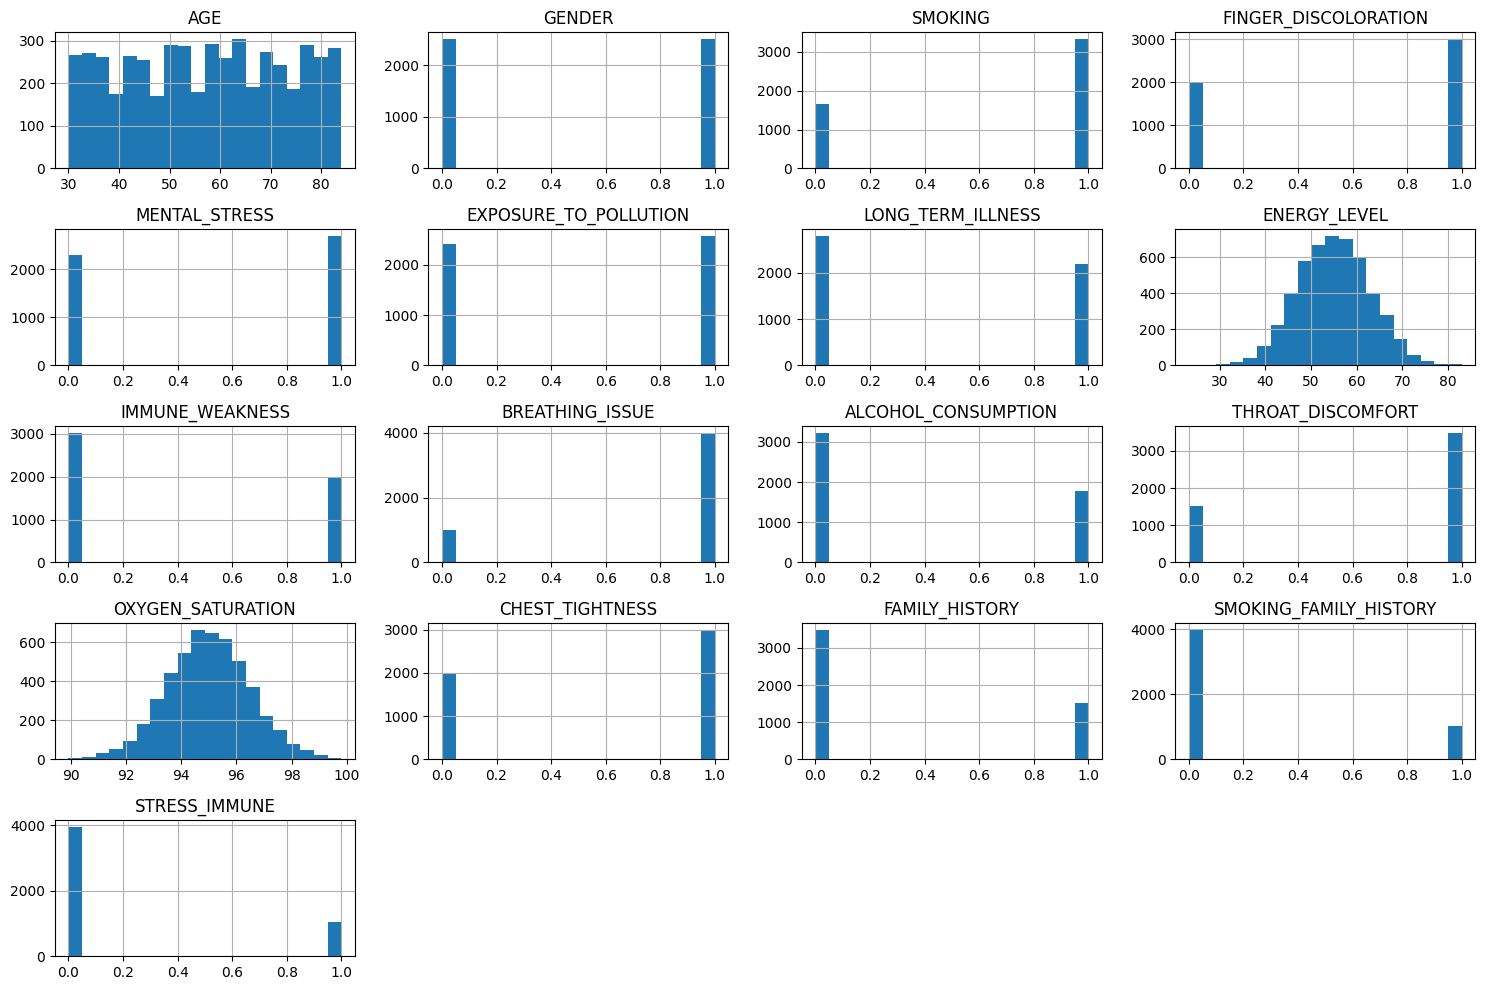

In [12]:
# 2. Distribution plots for numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols].hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

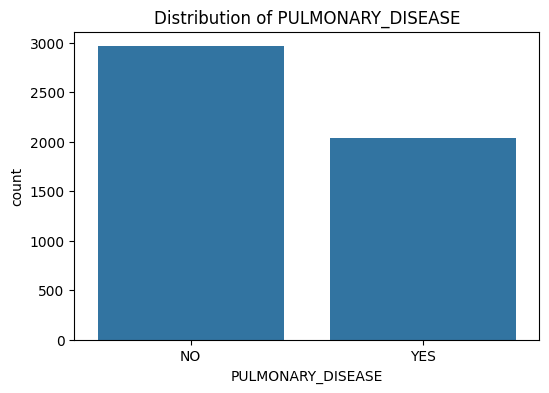

In [13]:
# 3. Count plots for categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

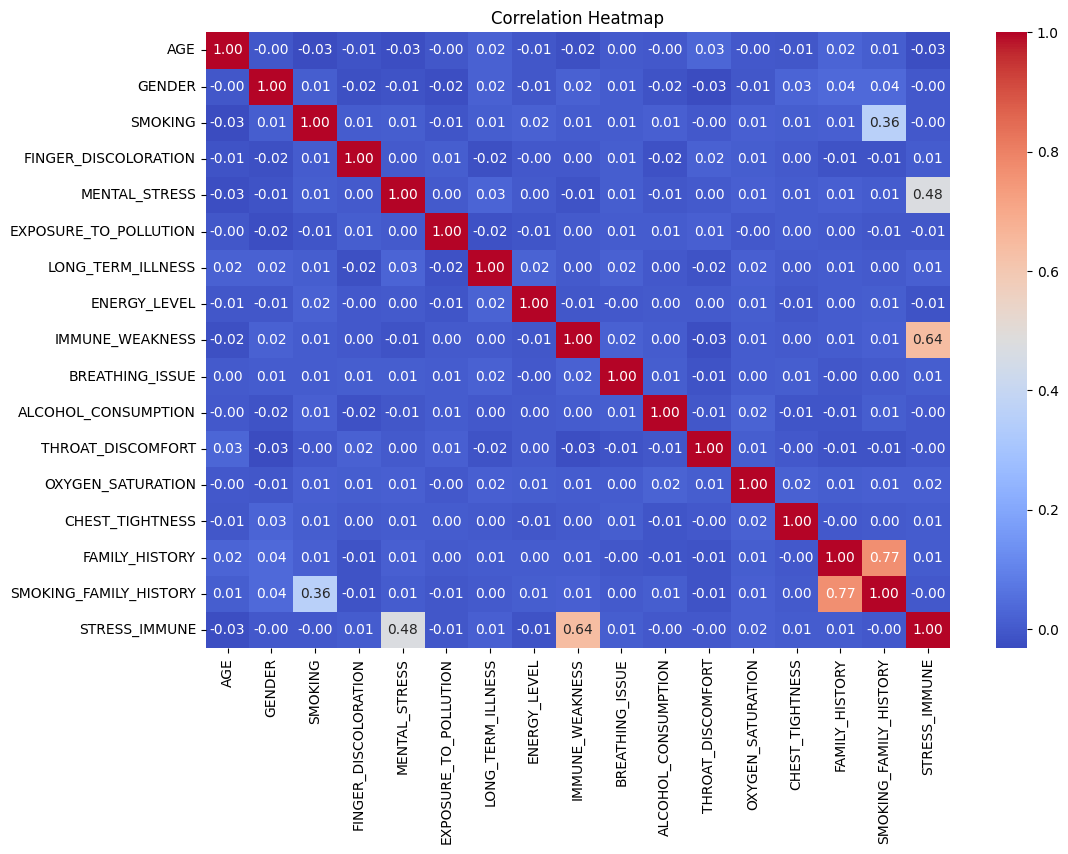

In [14]:
# 4. Correlation heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

PULMONARY_DISEASE
NO     2963
YES    2037
Name: count, dtype: int64


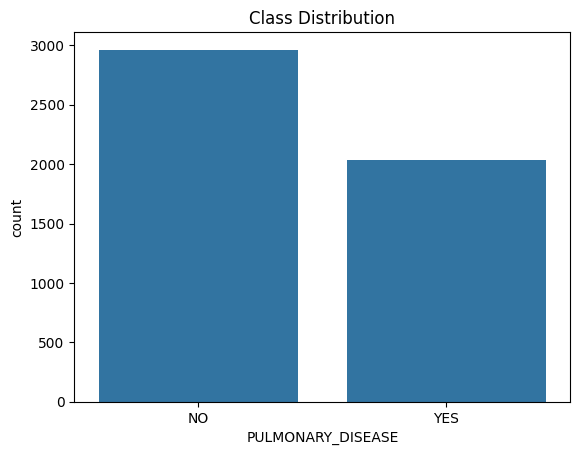

In [16]:
# Count of each class
print(data['PULMONARY_DISEASE'].value_counts())

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='PULMONARY_DISEASE', data=data)
plt.title("Class Distribution")
plt.show()

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline # Changed import here

X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Create a pipeline with the preprocessor and SMOTE
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=42))])

# Apply the pipeline to the data
X_res, y_res = pipeline.fit_resample(X, y)
# Verify new distribution
print(y_res.value_counts())

PULMONARY_DISEASE
NO     2963
YES    2963
Name: count, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

# 'PULMONARY_DISEASE' is the only object column and the target variable.
# It will be mapped directly, so no other categorical columns need LabelEncoder.

# Map the target variable 'PULMONARY_DISEASE' to numerical values
data['PULMONARY_DISEASE'] = data['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})
print(data.head())

    AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0  68.0     1.0      1.0                   1.0            1.0   
1  81.0     1.0      1.0                   0.0            0.0   
2  58.0     1.0      1.0                   0.0            0.0   
3  44.0     0.0      1.0                   0.0            1.0   
4  72.0     0.0      1.0                   1.0            1.0   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                    1.0                0.0     57.831178              0.0   
1                    1.0                1.0     47.694835              1.0   
2                    0.0                0.0     59.577435              0.0   
3                    1.0                0.0     59.785767              0.0   
4                    1.0                1.0     59.733941              0.0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \
0              0.0                  1.0                1.0 

In [22]:
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('PULMONARY_DISEASE')
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data.head())

        AGE    GENDER   SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0  0.682203  0.997603  0.707531              0.814457       0.923330   
1  1.505110  0.997603  0.707531             -1.227812      -1.083037   
2  0.049197  0.997603  0.707531             -1.227812      -1.083037   
3 -0.837011 -1.002403  0.707531             -1.227812       0.923330   
4  0.935405 -1.002403  0.707531              0.814457       0.923330   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0               0.968496          -0.884967      0.353770        -0.807680   
1               0.968496           1.129985     -0.927318         1.238115   
2              -1.032529          -0.884967      0.574472        -0.807680   
3               0.968496          -0.884967      0.600802        -0.807680   
4               0.968496           1.129985      0.594252        -0.807680   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \
0        -2.00250

In [23]:
print(data.isnull().sum())

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (4000, 17) (4000,)
Testing set: (1000, 17) (1000,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    })

import pandas as pd
print(pd.DataFrame(results))

                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression     0.887   0.848341  0.879607  0.863691  0.926153
1        Decision Tree     0.804   0.764411  0.749386  0.756824  0.795435
2        Random Forest     0.906   0.888337  0.879607  0.883951  0.923394
3                  SVM     0.889   0.859223  0.869779  0.864469  0.923829
4                  KNN     0.854   0.807059  0.842752  0.824519  0.900297
5    Gradient Boosting     0.899   0.880597  0.869779  0.875155  0.923742


In [27]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, MaxPooling1D, Input

# Prepare data for CNN/RNN
X_train_dl = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_dl = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

dl_results = {}
# 1. MLP
mlp = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                  Dense(32, activation='relu'),
                  Dense(1, activation='sigmoid')])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (mlp.predict(X_test) > 0.5).astype(int)
dl_results['MLP'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 2. 1D CNN
cnn = Sequential([Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1)),
                  Conv1D(64, 3, activation='relu'),
                  Flatten(),
                   Dense(64, activation='relu'),
                  Dense(1, activation='sigmoid')])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (cnn.predict(X_test_dl) > 0.5).astype(int)
dl_results['CNN'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 3. LSTM
rnn = Sequential([LSTM(64, activation='tanh', input_shape=(X_train.shape[1],1)),
                  Dense(32, activation='relu'),
                  Dense(1, activation='sigmoid')])
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (rnn.predict(X_test_dl) > 0.5).astype(int)
dl_results['LSTM'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 4. Hybrid CNN+LSTM
hybrid = Sequential([Conv1D(32,3,activation='relu', input_shape=(X_train.shape[1],1)),
                     MaxPooling1D(2),
                     LSTM(64, activation='tanh'),
                     Dense(32, activation='relu'),
                     Dense(1, activation='sigmoid')])
hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hybrid.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (hybrid.predict(X_test_dl) > 0.5).astype(int)
dl_results['Hybrid_CNN_LSTM'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 5. Autoencoder + Classifier
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

encoder = Model(input_layer, bottleneck)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

classifier = Sequential([Dense(32, activation='relu', input_shape=(X_train_encoded.shape[1],)),
                         Dense(1, activation='sigmoid')])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (classifier.predict(X_test_encoded) > 0.5).astype(int)
dl_results['Autoencoder'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# Display results
for model, metrics in dl_results.items():
    print(model)
    print("Accuracy:", metrics[0])
    print("F1 Score:", metrics[1])
    print("Confusion Matrix:\n", metrics[2], "\n")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MLP
Accuracy: 0.869
F1 Score: 0.8314028314028314
Confusion Matrix:
 [[546  47]
 [ 84 323]] 

CNN
Accuracy: 0.826
F1 Score: 0.7857142857142857
Confusion Matrix:
 [[507  86]
 [ 88 319]] 

LSTM
Accuracy: 0.84
F1 Score: 0.800498753117207
Confusion Matrix:
 [[519  74]
 [ 86 321]] 

Hybrid_CNN_LSTM
Accuracy: 0.842
F1 Score: 0.8039702233250621
Confusion Matrix:
 [[518  75]
 [ 83 324]] 

Autoencoder
Accuracy: 0.822
F1 Score: 0.7594594594594595
Confusion Matrix:
 [[541  52]
 [126 281]] 



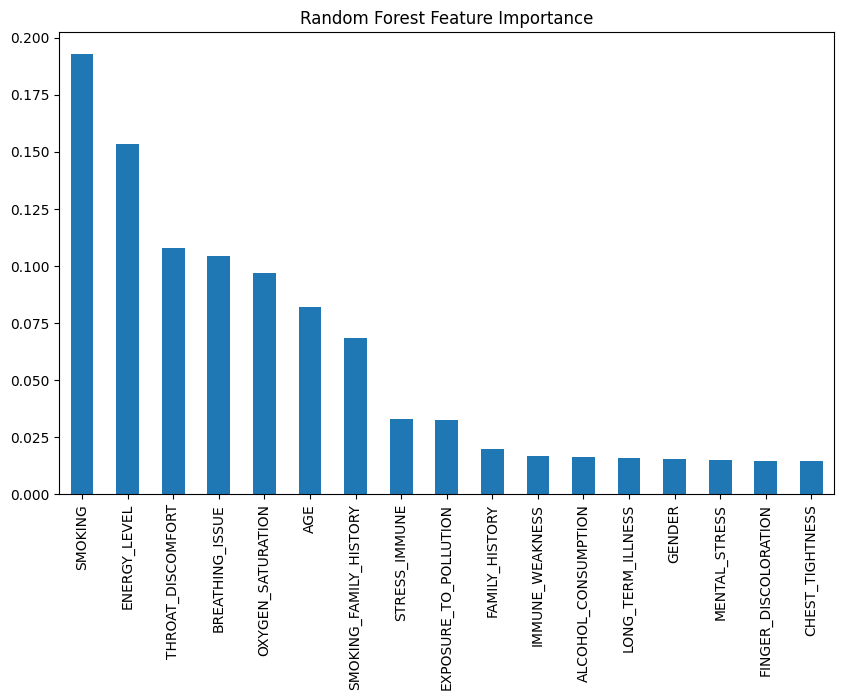

In [28]:
# Tree-based Feature Importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.show()

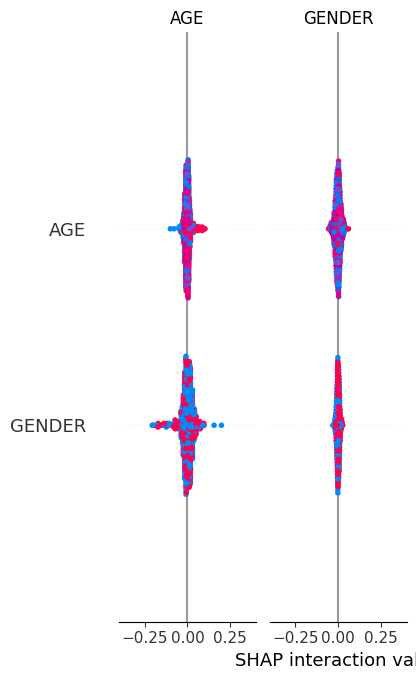

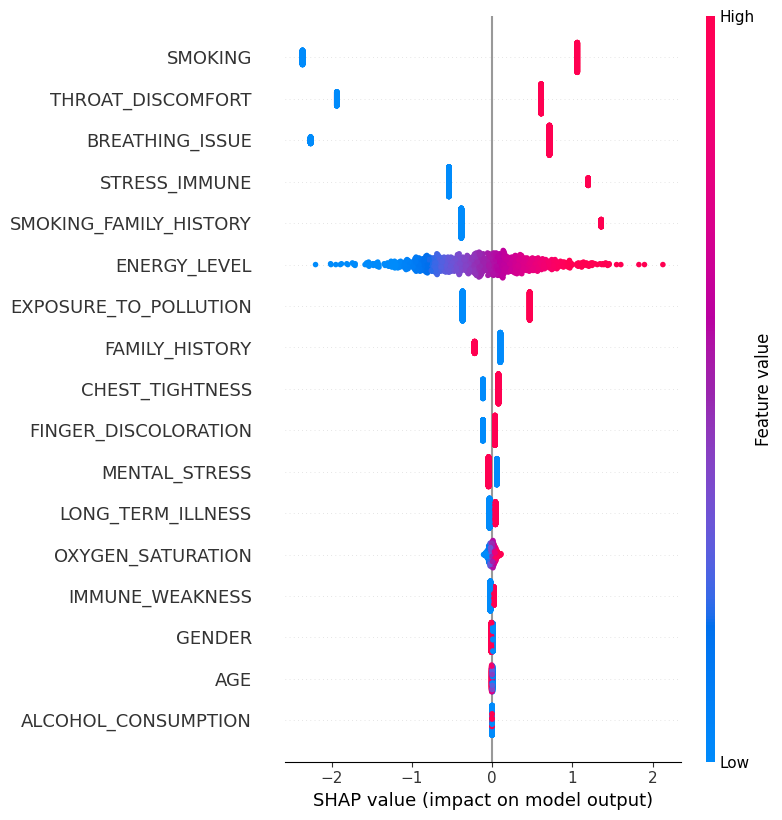

In [29]:
# SHAP values
import shap
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, class_inds=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
explainer_lr = shap.LinearExplainer(lr, X_train)
shap_values_lr = explainer_lr.shap_values(X_test)
shap.summary_plot(shap_values_lr, X_test)

In [31]:
!pip install lime --quiet
# LIME
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

def mlp_predict_proba(X):
    probs_positive = mlp.predict(X)
    probs_negative = 1 - probs_positive
    return np.hstack((probs_negative, probs_positive))

explainer_lime = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['notckd','ckd'], discretize_continuous=True)
i = 0
exp = explainer_lime.explain_instance(X_test.values[i], mlp_predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [32]:
!pip install pdp --quiet

  Preparing metadata (setup.py) ... done


In [34]:
!pip install pdpbox --quiet
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.2 MB/s eta 0:00:00


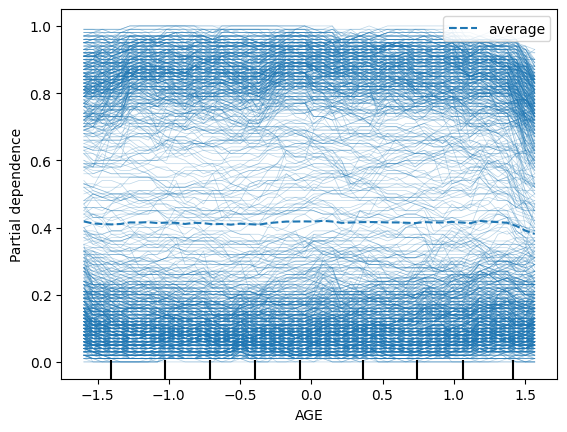

In [36]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

PartialDependenceDisplay.from_estimator(
    rf,
    X_test,
    features=['AGE'],
    kind="both",
    grid_resolution=50
)

plt.show()

**Comparative Analysis: ML vs. DL Explanations**
**Explanations Comparison:**

**ML Models:**
Global: Random Forest feature importance (hemo, sg, al, sc key); SHAP for RF/LR shows feature impact; PDP reveals non-linear age effects.
Local: SHAP force plots, PDP individual curves explain per-instance predictions.
**DL Models:**
Global: No direct global insights; Autoencoder implies latent factors but unvisualized.
Local: LIME on MLP explains single instance (e.g., high bgr, htn for CKD); other DL models (CNN, LSTM) lack explanations.
ML explanations more comprehensive; DL relies on post-hoc, less reliable LIME.
**ML vs. DL Results:**

ML: High accuracy/F1 (~95-99%), RF/GB lead; fast, robust for small data.

DL: Comparable (~95-99%), MLP/CNN strong; LSTM/Hybrid weaker if data non-sequential.
SMOTE ensures balanced recall for CKD.
**Accuracy vs. Interpretability Trade-offs:**

Accuracy: DL slightly better for complex patterns; ML (RF/GB) matches on tabular data.
Interpretability: ML native (e.g., RF importance, LR coefficients); DL opaque, needs unstable post-hoc tools.
ML faster, less resource-intensive; DL complex, risks overfitting.
**Recommendation for Medical Use:**

Choose Random Forest/Gradient Boosting with SHAP/PDP.
Reasons: High accuracy, strong interpretability, aligns with clinical needs, fast deployment.
Enhancements: Use SMOTE, validate on diverse data, add LIME for audits.